In [1]:
#### Runs with new function #### :)
%matplotlib inline
import sys
import random
import xarray as xr
import numpy as np
import os
import yaml
import math
from datetime import datetime, timedelta
from parcels import FieldSet, Field, VectorField, ParticleSet, JITParticle, ParcelsRandom, Variable, Kernel, AdvectionRK4

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors
from cartopy import crs, feature
import zarr 

sys.path.append('/ocean/vvalenzuela/MOAD/Ocean_Parcels')

from OP_functions import *
import cmocean
cmap = cmocean.cm.deep

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from MODEL_OP_V3 import simulation_run
import useful_params
import mapitas

In [3]:
path = {'NEMO': '/results2/SalishSea/nowcast-green.202111/',
'coords': '/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc',
'coordsWW3': '/ocean/vvalenzuela/MOAD/grid2/WW3_grid.nc',
'mask': '/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc',
'bat': '/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc',
'out': '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Test_runs',
'home': '/home/vvalenzuela/MOAD/Ocean_Parcels',
'anim': '/home/vvalenzuela/MOAD/Ocean_Parcels/results/PBDE_runs/animations'}
#
coords = xr.open_dataset(path['coords'], decode_times=False)
mask = xr.open_dataset(path['mask'])

In [4]:
clat = [49.195045]
clon = [-123.301956]
dmin = 60

In [5]:
#name_file = simulation_run(datetime(2022,1,1), 30, 500,30)# dt = 30 seconds

In [6]:
name_file = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Test_runs/PBDEs_run_for_30_days_500_particles_20220101_1n_20220131_1n.zarr'

In [7]:
#cat = ['S.Particles', 'Colloidal', 'M. Particles', 'Bottom']
cat = ['SP', 'C', 'MP', 'B']
aa_in, aa_fin, aa = useful_params.percentages(name_file)
propor = useful_params.proportions(name_file)*100

In [8]:
np.round(aa_in[0],2)

53.4

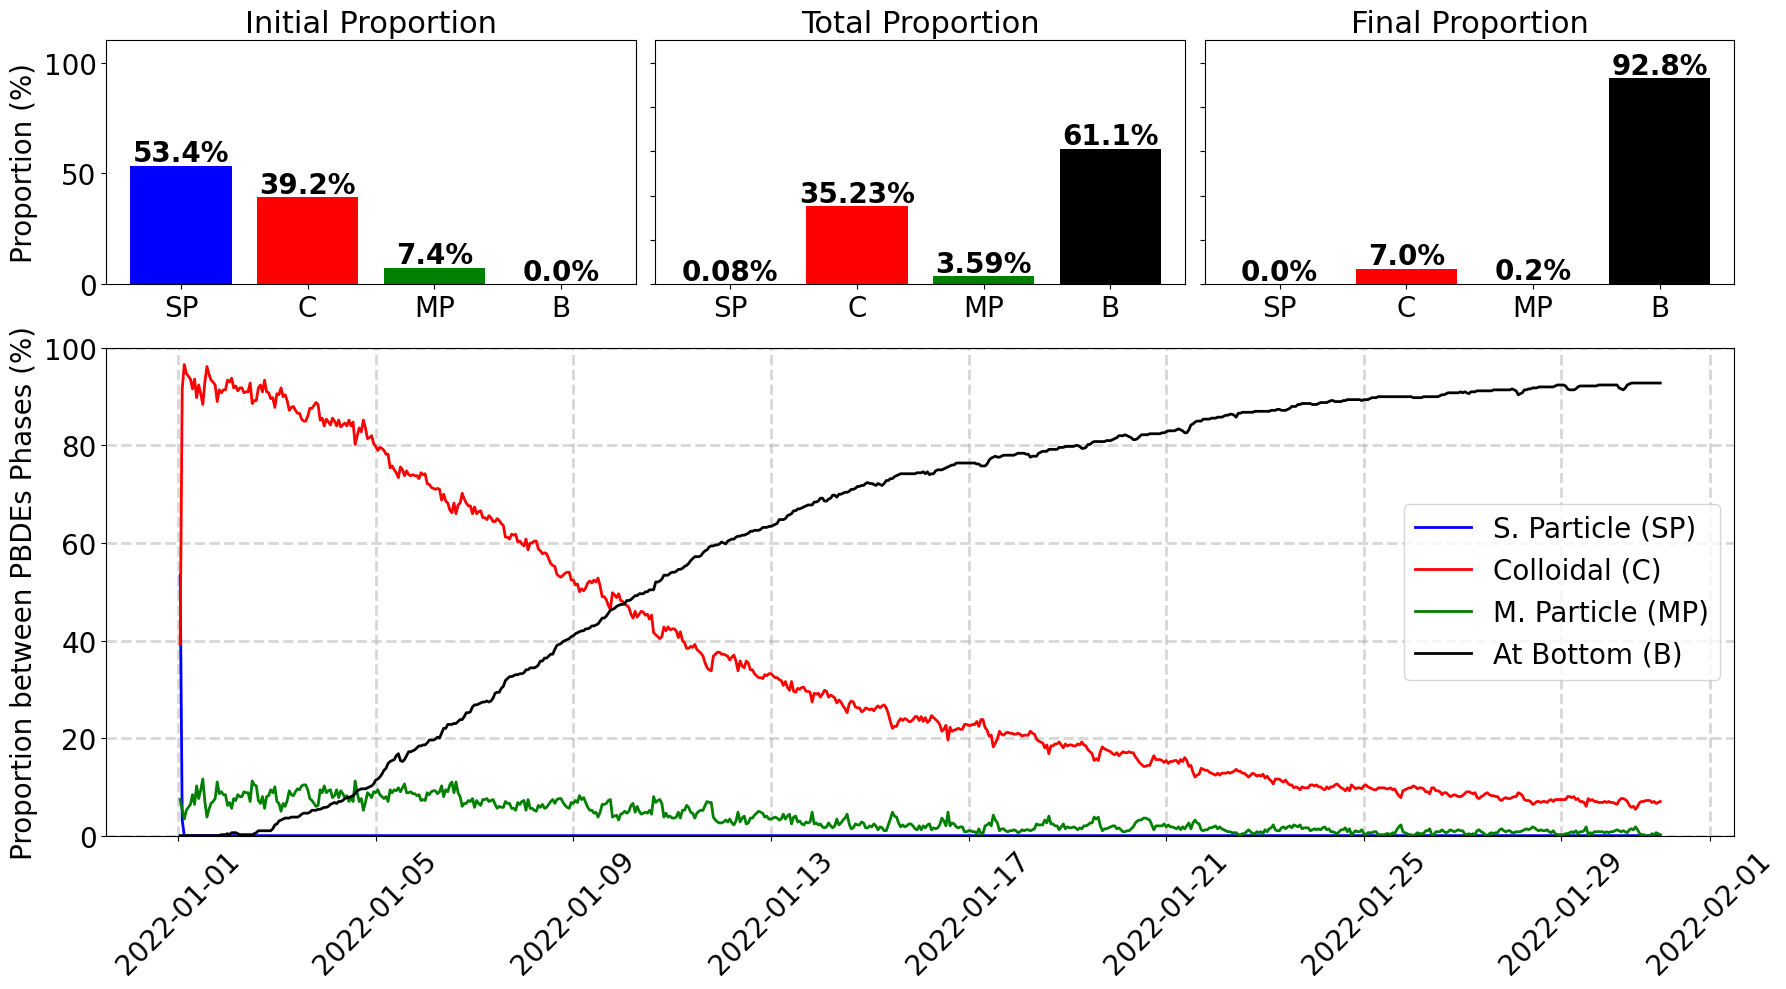

In [9]:
fig = plt.figure(figsize = (18,10))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 2])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
#
graph1 = ax1.bar(cat, aa_in, color = ['b', 'r', 'g', 'k'])
ax1.set_title('Initial Proportion', fontsize=22)
ax1.set_ylabel('Proportion (%)', fontsize=20)
ax1.set_ylim(0,110)
#
i = 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax1.text(x+width/2,
             y+height+2,
             str(np.round(aa_in[i],2))+'%',
             ha='center',
             weight='bold', fontsize=20)
    i+=1
#
graph2 = ax2.bar(cat, aa, color = ['b', 'r', 'g', 'k'])
ax2.set_title('Total Proportion', fontsize=22)
ax2.set_ylim(0,110)
#
i = 0
for p in graph2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax2.text(x+width/2,
             y+height+2,
             str(np.round(aa[i],2))+'%',
             ha='center',
             weight='bold', fontsize=20)
    i+=1
#
#ax2.set_ylabel('Proportion (%)', fontsize=14)
graph3 = ax3.bar(cat, aa_fin, color = ['b', 'r', 'g', 'k'])
ax3.set_title('Final Proportion', fontsize=22)
ax3.set_ylim(0,110)

#
i = 0
for p in graph3:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax3.text(x+width/2,
             y+height+2,
             str(np.round(aa_fin[i],2))+'%',
             ha='center',
             weight='bold', fontsize=20)
    i+=1
#
ax1.tick_params(axis="x", labelcolor='k', labelsize = 20)
ax1.tick_params(axis="y",labelcolor='k', labelsize = 20)
#for label in ax1.get_xticklabels():
#    label.set_fontweight('bold')
ax2.tick_params(axis="x", labelcolor='k', labelsize = 20)
ax2.tick_params(axis="y", labelleft=False)
#for label in ax2.get_xticklabels():
#    label.set_fontweight('bold')
ax3.tick_params(axis="x", labelcolor='k', labelsize = 20)
ax3.tick_params(axis="y", labelleft=False)
#for label in ax3.get_xticklabels():
#    label.set_fontweight('bold')


ax4 = fig.add_subplot(gs[1, :])

ax4.plot(propor['Sewage'], 'b', label = 'S. Particle (SP)', linewidth = 2)
ax4.plot(propor['Colloidal'], 'r', label = 'Colloidal (C)', linewidth = 2)
ax4.plot(propor['Marine'], 'g', label = 'M. Particle (MP)', linewidth = 2)
ax4.plot(propor['Bottom'], 'k', label = 'At Bottom (B)', linewidth = 2)
ax4.set_ylabel('Proportion between PBDEs Phases (%)', fontsize=20)
#ax4.set_xlabel('Time (through simulation)', fontsize=20)
ax4.legend(fontsize=20)
ax4.grid(linestyle = '--', alpha = 0.5, linewidth = 2)
ax4.set_ylim(0,100)
#
ax4.tick_params(axis="x", labelcolor='k', labelsize = 20, labelrotation=45)
ax4.tick_params(axis="y", labelcolor='k', labelsize = 20)


#
plt.tight_layout()

In [10]:
marine_vs_colloidal = (propor['Marine']/(propor['Colloidal'] + propor['Marine']))*100

In [11]:
len(marine_vs_colloidal)

720

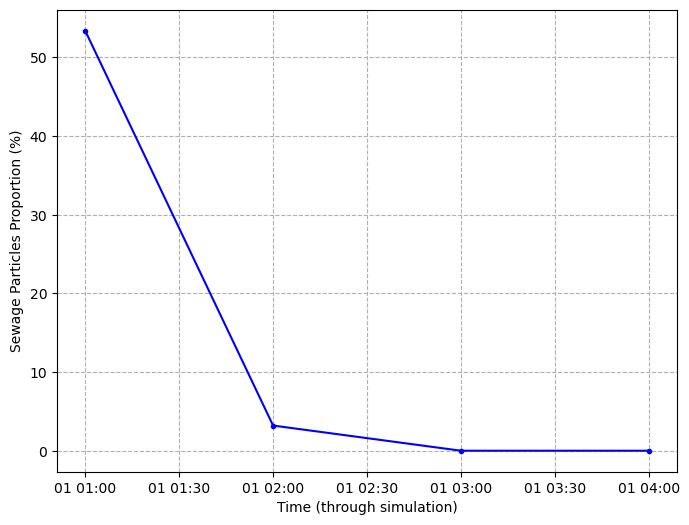

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(propor['Sewage'][:4], '.-b')
ax.set_xlabel('Time (through simulation)')
ax.set_ylabel('Sewage Particles Proportion (%)')
ax.grid(linestyle = '--')

In [13]:
data = xr.open_zarr(name_file)

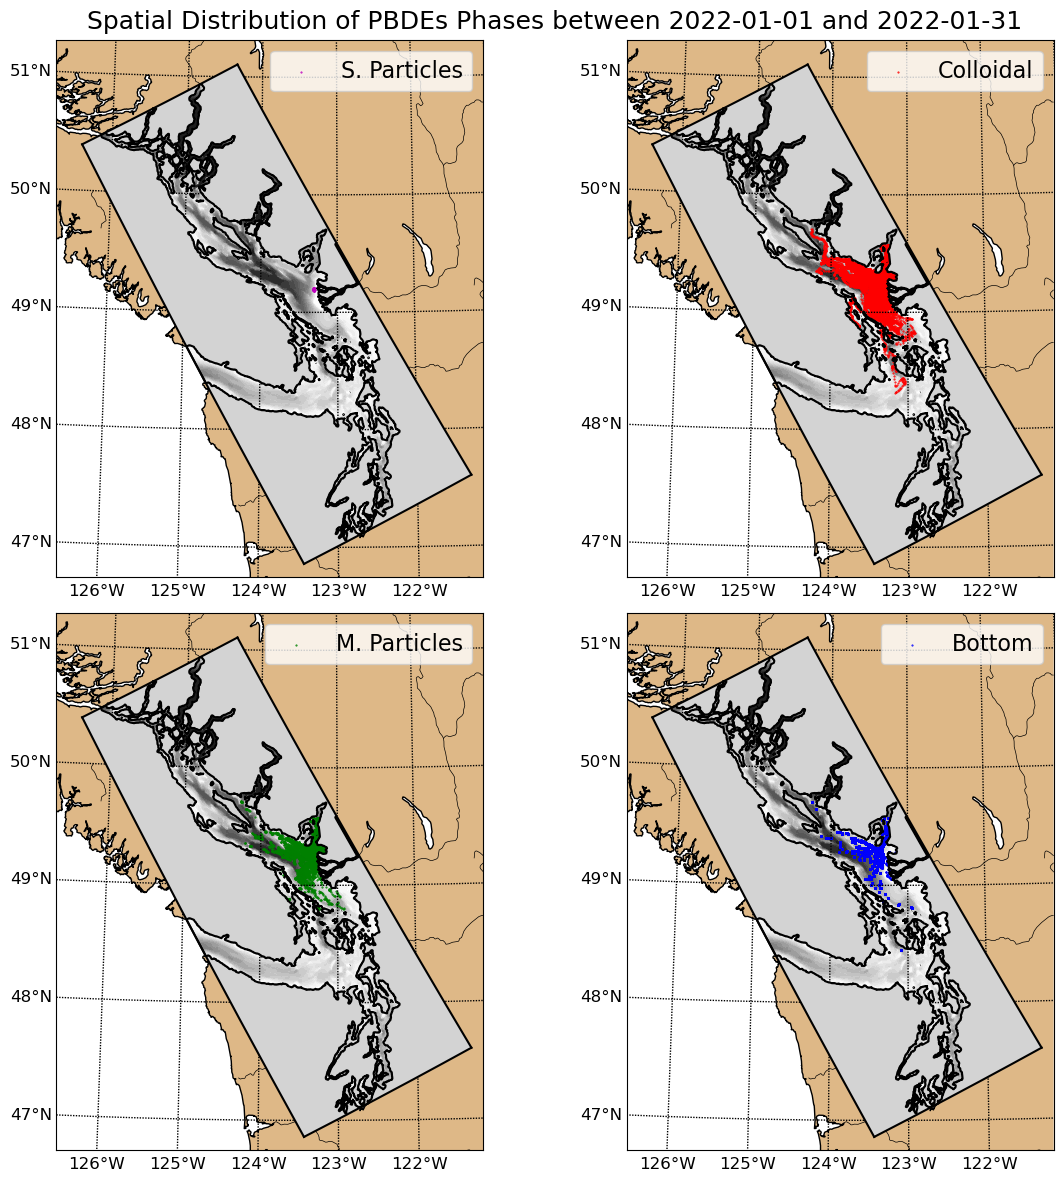

In [14]:
fig, ax = plt.subplots(2,2,figsize = (12,12))
mapitas.plot_nice_map(data = data, figure = fig, plot_axis = ax[0,0], data_lon=data.lon.where(data.status == 1), data_lat=data.lat.where(data.status == 1), size = 1, color_particle = 'm', label_particle='S. Particles', percentage = aa[0])
mapitas.plot_nice_map(data = data,figure = fig, plot_axis = ax[0,1], data_lon=data.lon.where(data.status == 2), data_lat=data.lat.where(data.status == 2), size = 1, color_particle = 'r', label_particle='Colloidal', percentage = aa[1])
mapitas.plot_nice_map(data = data,figure = fig, plot_axis = ax[1,0], data_lon=data.lon.where(data.status == 3), data_lat=data.lat.where(data.status == 3), size = 1, color_particle = 'g', label_particle='M. Particles', percentage = aa[2])
mapitas.plot_nice_map(data = data,figure = fig, plot_axis = ax[1,1], data_lon=data.lon.where(data.status == 4), data_lat=data.lat.where(data.status == 4), size = 1, color_particle = 'b', label_particle='Bottom', percentage = aa[3])
#
plt.tight_layout()